# 一致性のシミュレーション

- $\sqrt{n}$-consistentのシミュレーション
- 線形回帰だとどうか

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 標本平均の漸近分布

### 概要

標本平均$\bar{X}=\sum X_i / n$を標準化すると

$$
\frac{\bar{X}-\mathrm{E}(\bar{X})}{\sqrt{\operatorname{Var}(\bar{X})}}
=\frac{\bar{X}-\mu_X}{\sqrt{\sigma_X^2 / n}}
=\frac{\sqrt{n}\left(\bar{X}-\mu_X\right)}{\sigma_X}
$$


これは中心極限定理により

$$
\frac{\sqrt{n}\left(\bar{X}-\mu_X\right)}{\sigma_X} \xrightarrow{d} N(0,1)
$$

となる。式を整理して表現を少し変えると

$$
\sqrt{n}\left(\bar{X}-\mu_X\right) \xrightarrow{d} N\left(0, \sigma_X^2\right)
$$

である。

$\bar{X}$の分布が$N\left(\mu_X, \frac{\sigma_X^2}{n}\right)$に近似的に従う

$$
\bar{X} \stackrel{a}{\sim} N\left(\mu_X, \frac{\sigma_X^2}{n}\right)
$$

と表すこともできる。このことを「$\bar{X}$は漸近的に正規分布$N\left(\mu_X, \frac{\sigma_X^2}{n}\right)$に従う」という。

### シミュレーション

モンテカルロシミュレーションで標準誤差を確かめてみる

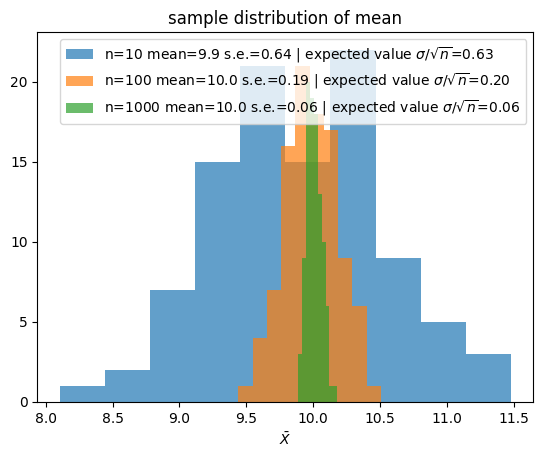

In [25]:
np.random.seed(0)
fig, ax = plt.subplots()
n_iter = 100
loc = 10
scale = 2
for n in [10, 100, 1000]:
    means = []
    for i_iter in range(n_iter):
        samples = np.random.normal(loc=loc, scale=scale, size=n)
        means.append(samples.mean())
    ax.hist(means, label=f"{n=} mean={np.mean(means):.1f} s.e.={np.std(means):.2f} | " + r"expected value $\sigma/\sqrt{n}$" + f"={scale/np.sqrt(n):.2f}", alpha=0.7)
ax.legend()
ax.set(xlabel=r"$\bar{X}$", title="sample distribution of mean")
fig.show()

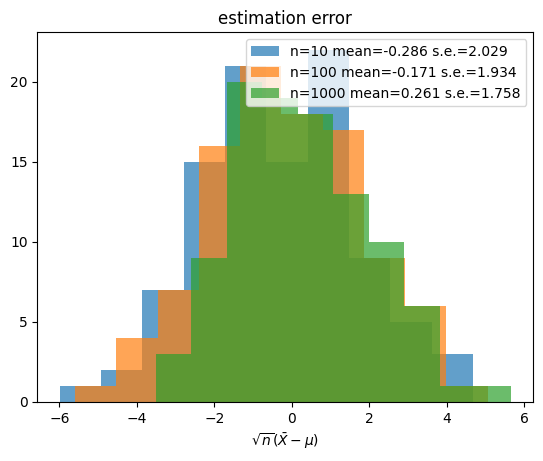

In [23]:
np.random.seed(0)
fig, ax = plt.subplots()
n_iter = 100
mu = 10
sigma = 2
for n in [10, 100, 1000]:
    errors = []
    for i_iter in range(n_iter):
        samples = np.random.normal(loc=mu, scale=sigma, size=n)
        mu_hat = samples.mean()
        error = np.sqrt(n) * (mu_hat - mu)
        errors.append(error)
    ax.hist(errors, label=f"{n=} mean={np.mean(errors):.3f} s.e.={np.std(errors):.3f}", alpha=0.7)
ax.legend()
ax.set(xlabel=r"$\sqrt{n}(\bar{X} - \mu)$", title="estimation error")
fig.show()